In [1]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git

fatal: destination path 'pyAudioAnalysis' already exists and is not an empty directory.


In [2]:
!pip install -r pyAudioAnalysis/requirements.txt

In [3]:
!pip install -e pyAudioAnalysis/.

Obtaining file:///content/pyAudioAnalysis
  Running setup.py develop for pyAudioAnalysis


In [0]:
#!pip install cffi

In [0]:
#!pip install rpy2

In [0]:
#!pip install libmagic

In [0]:
#pip install python-magic-bin==0.4.14

In [8]:
# Solution from https://github.com/tyiannak/pyAudioAnalysis/issues/128
!sudo apt-get install ffmpeg
!sudo apt-get install python3-magic
!pip install python-magic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-mgc libmagic1 python3-magic
0 upgraded, 3 newly installed, 0 to remove and 43 not upgraded.
Need to get 262 kB of archives.
After this operation, 5,257 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bion

In [9]:
!pip install pytube3 --upgrade

In [0]:
#!pip install ffmpeg

In [11]:
!pip install ffmpeg-python

In [0]:
from pyAudioAnalysis import audioTrainTest as aT
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
from pytube import YouTube
import matplotlib.pyplot as plt
import ffmpeg
import os

from pytube.exceptions import RegexMatchError, VideoUnavailable
from json import JSONDecodeError
import time

import pandas as pd
from tqdm.auto import tqdm
import numpy as np

import torch
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

In [0]:
from urllib.error import HTTPError

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = '/content/drive/My Drive/Audio/data/test/'
#os.listdir(data_dir)

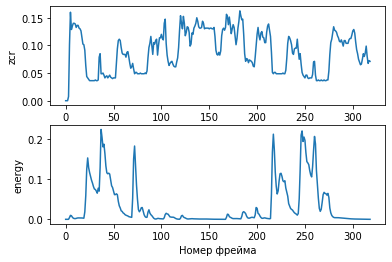

In [20]:
filename = 'doremi.wav'

# Read file
[Fs, x] = audioBasicIO.read_audio_file(data_dir+filename)

# Extract features
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Номер фрейма'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Номер фрейма'); plt.ylabel(f_names[1]); plt.show()


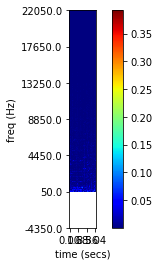

In [22]:
from pyAudioAnalysis import audioAnalysis

audioAnalysis.fileSpectrogramWrapper("/content/drive/My Drive/Audio/never_gonna.wav")

In [0]:
def to_hhmmss(ss):
    hh = ss//3600
    ss %= 3600
    mm = ss//60
    ss %= 60
    return "%02i:%02i:%02i" % (hh, mm, ss)

to_hhmmss(6342)

'01:45:42'

In [0]:
from pytube import YouTube

In [0]:
# Load the AudioSet training set
with open('/content/drive/My Drive/Audio/unbalanced_train_segments.csv') as f:
    lines = f.readlines()

dl_list = [line.strip().split(',')[:3] for line in lines[3:]]

In [0]:
link = 'https://youtu.be/geDCgNVWJo0'
streams = YouTube(link).streams
url = YouTube(link).streams.get_by_itag(251).url

download_file_path = '/content/drive/My Drive/Audio/fly_me.wav'

In [0]:
for i in streams:
  print(i)

<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="30fps" vcodec="avc1.640028" progressive="False" type="video">
<Stream: itag="248" mime_type="video/webm" res="1080p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="299" mime_type="video/mp4" res="1080p" fps="60fps" vcodec="avc1.64002a" progressive="False" type="video">
<Stream: itag="303" mime_type="video/webm" res="1080p" fps="60fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">
<Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">
<Stream: itag="298" mime_type="video/mp4" res="720p" fps="60fps" vcodec="avc1.4d4020" progressive="False" type="video">
<Stream: itag="302" mime_type="video/web

In [0]:
link = 'https://youtu.be/dQw4w9WgXcQ'
# streams = YouTube(link).streams
# # url = YouTube(link).streams.get_by_itag(251).url

download_file_path = '/content/drive/My Drive/Audio/fly_me.wav'

In [17]:
download_file_path

'/content/drive/My Drive/Audio/never_gonna.wav'

In [0]:
url = 'https://r13---sn-axq7sn7l.googlevideo.com/videoplayback?expire=1591987442&ei=knjjXp6UFoLcgwOprI3YDw&ip=176.222.248.81&id=o-ADMVLnYx7zZ0qRF5N4bePPrMzP4WYZK00202h5hyvkvE&itag=18&source=youtube&requiressl=yes&gcr=ru&vprv=1&mime=video%2Fmp4&gir=yes&clen=15929856&ratebypass=yes&dur=212.091&lmt=1578933304205652&fvip=13&c=WEB&txp=5531432&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cgcr%2Cvprv%2Cmime%2Cgir%2Cclen%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRQIhALzXCe43SZ1uSvm7bY7V-WP64gjtIHuMOgV38c7eV6rqAiARQ1VGkHphx91uL9RQZPVxus8MPaZ8qlfDCTVn3Y-YVg%3D%3D&video_id=dQw4w9WgXcQ&title=Rick+Astley+-+Never+Gonna+Give+You+Up+%28Video%29&rm=sn-0bh3-n8me7l,sn-bvvbax-n8mees&req_id=ead442fb6e4aa3ee&redirect_counter=2&cms_redirect=yes&ipbypass=yes&mh=7c&mip=217.197.0.45&mm=29&mn=sn-axq7sn7l&ms=rdu&mt=1591972963&mv=u&mvi=12&nh=IgpwcjAyLmxlZDAzKgkxMjcuMC4wLjE&pl=20&lsparams=ipbypass,mh,mip,mm,mn,ms,mv,mvi,nh,pl&lsig=AG3C_xAwRgIhAPayKNLvVLXNMyDnKSqLQFr5bpBXz705txf4bzS2W7sDAiEArahJYYWCHonDmImyiP3PJLDSInA8TnCEycrS8yn_jbg%3D'

In [19]:
try:
  (ffmpeg
    .input(url, ss='00:00:00', t='00:00:10')
    .output(download_file_path, acodec='pcm_s16le', ac=1, ar='16k')
    .overwrite_output()
    .run(capture_stdout=True, capture_stderr=True))
except ffmpeg.Error as e:
  print('stdout:' + e.stdout.decode('utf8'))
  print('stderr:' + e.stderr.decode('utf8'))

stdout:
stderr:ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enabl

In [0]:
# (ffmpeg
#              .input(url, ss=start, to=tt)
#              .output(download_file_path, acodec='pcm_s16le', ac=1, ar='16k')
#              .overwrite_output()
#              .run(capture_stdout=True))  

In [0]:
link = 'https://youtu.be/'+dl_list[18869][0]

In [0]:
dl_list[18869]

['-I7OuxdotZY', ' 420.000', ' 430.000']

In [0]:
start_timer = time.time()   

log_filename = '/content/drive/My Drive/Audio/log.txt'
f = open(log_filename, "a")
print('---Process started...---')
f.write('---Process started...---')

for i in range(14000, 15000):
    link = 'https://youtu.be/'+dl_list[i][0]
    itag = 251
    
    try:
        time.sleep(10)
        url = YouTube(link).streams.get_by_itag(itag).url
    except RegexMatchError:
        print("Can't download video %i - RegexMatchError"  % (i))
        f.write("Can't download video %i - RegexMatchError\n" % (i))
        continue
    except AttributeError:
        print("Can't download video %i - AttributeError" % (i))
        f.write("Can't download video %i - AttributeError\n" % (i))
        continue
    except KeyError:
        print("Can't download video %i - KeyError" % (i))
        f.write("Can't download video %i - KeyError\n" % (i))
        continue
    except JSONDecodeError:
        print("Can't download video %i - JSONDecodeError" % (i))
        f.write("Can't download video %i - JSONDecodeError\n" % (i))
        continue
    except VideoUnavailable:
        print("Can't download video %i - VideoUnavailableError" % (i))
        f.write("Can't download video %i - VideoUnavailableError\n" % (i))
        continue
    except HTTPError:
        print("Can't download video %i - HTTPError" % (i))
        f.write("Can't download video %i - HTTPError\n" % (i))
        break

    dur_id = url.find('&dur=')+5
    dur_id2 = url.find('&', dur_id)
    dur = float(url[dur_id:dur_id2])
    
    window_begin = int(dl_list[i][1].split('.')[0])
    window_end = int(dl_list[i][2].split('.')[0])
    t = window_end - window_begin
    
    if (window_end < dur):
        start = to_hhmmss(window_begin)
        tt = to_hhmmss(window_end)
        window = to_hhmmss(t)

        download_file_path = data_dir+'%i.wav' % (i) 
        
        try:
            (ffmpeg
             .input(url, ss=start, t=window)
             .output(download_file_path, acodec='pcm_s16le', ac=1, ar='16k')
             .overwrite_output()
             .run(capture_stdout=True))  
            print('Video %i downloaded' % (i))
            f.write('Video %i downloaded\n' % (i))
        except ffmpeg.Error as e:
            print('stdout:' + e.stdout.decode('utf8'))
            f.write("Can't download video %i\n" % (i))
            f.write('stdout:' + e.stdout.decode('utf8' + '\n'))
            continue
    else:
        print("Can't download video %i - Duration" % (i))
        f.write("Can't download video %i - Duration\n" % (i))

end_timer = time.time()
print('Elapsed time: %i' % round(end_timer - start_timer))
f.write('Elapsed time: %i' % round(end_timer - start_timer))

f.close()

---Process started...---
Video 14000 downloaded
Video 14001 downloaded
Video 14002 downloaded
Video 14003 downloaded
Can't download video 14004 - RegexMatchError
Video 14005 downloaded
Can't download video 14006 - Duration
Video 14007 downloaded
Video 14008 downloaded
Video 14009 downloaded
Video 14010 downloaded
Can't download video 14011 - VideoUnavailableError
Video 14012 downloaded
Video 14013 downloaded
Video 14014 downloaded
Video 14015 downloaded
Video 14016 downloaded
Video 14017 downloaded
Video 14018 downloaded
Can't download video 14019 - Duration
Video 14020 downloaded
Video 14021 downloaded
Video 14022 downloaded
Video 14023 downloaded
Video 14024 downloaded
Can't download video 14025 - RegexMatchError
Video 14026 downloaded
Video 14027 downloaded
Video 14028 downloaded
Video 14029 downloaded
Can't download video 14030 - VideoUnavailableError
Video 14031 downloaded
Video 14032 downloaded
Video 14033 downloaded
Video 14034 downloaded
Video 14035 downloaded
Can't download vi

In [0]:
YouTube('https://www.youtube.com/watch?v=hHAppNg2eWo').streams

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="244" mime_type="video/webm" res="480p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="243" mime_type="video/webm" res="360p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="133

# Classifier

In [0]:
import json
import os
from os import listdir

In [0]:
data_dir = '/content/drive/My Drive/Audio/data/'
file_names = [f for f in listdir(data_dir)]
print(f'Total Number of Files:\t{len(file_names)}')

Total Number of Files:	6502


In [0]:
with open('/content/drive/My Drive/Audio/ontology.json') as f:
    json_data = json.load(f) 

print(len(json_data))
print(json_data[0])

632
{'id': '/m/0dgw9r', 'name': 'Human sounds', 'description': 'Sounds produced by the human body through the actions of the individual.', 'citation_uri': '', 'positive_examples': [], 'child_ids': ['/m/09l8g', '/m/01w250', '/m/09hlz4', '/m/0bpl036', '/m/0160x5', '/m/0k65p', '/m/01jg02', '/m/04xp5v', '/t/dd00012'], 'restrictions': ['abstract']}


In [0]:
label_list = [line.strip().split('"')[1].split(',') for line in lines[3:]]

In [0]:
label_list[0]

['/m/01g50p', '/m/0284vy3', '/m/06d_3', '/m/07jdr', '/m/07rwm0c']

In [0]:
for i in range(10):
    print(json_data[i]['id'], json_data[i]['name'])

/m/0dgw9r Human sounds
/m/09l8g Human voice
/m/09x0r Speech
/m/05zppz Male speech, man speaking
/m/02zsn Female speech, woman speaking
/m/0ytgt Child speech, kid speaking
/m/01h8n0 Conversation
/m/02qldy Narration, monologue
/m/0261r1 Babbling
/m/0brhx Speech synthesizer


In [0]:
speech = '/m/09x0r'

for i in range(10):
    print(speech in label_list[i])

False
True
False
True
True
False
False
False
False
True


In [0]:
int(file_names[0][:-4])

18739

In [0]:
file_names_wav = list(filter(lambda x: len(x)>4, file_names))
print(len(file_names))
print(len(file_names_wav))

6502
6501


In [0]:
file_idx = list(map(lambda x: int(x[:-4]), file_names_wav))

In [0]:
file_idx[1]

18740

In [0]:
label_list[18740]

['/m/09x0r']

In [0]:
 import IPython.display as ipd


In [0]:
audio_dir = '/content/drive/My Drive/Audio/'
filename = 'fly_me.wav'
ipd.Audio(audio_dir+filename)

In [0]:
cls = [x for x in json_data if x['id'] == '/m/01kcd']

In [0]:
cls

[{'child_ids': ['/m/0319l', '/m/07gql', '/m/07c6l', '/m/020w2', '/m/0y64j'],
  'citation_uri': 'http://en.wikipedia.org/wiki/Brass_instrument',
  'description': "The sound of a musical instrument that produces sound by vibration of air in a tubular resonator in sympathy with the vibration of the player's lips.",
  'id': '/m/01kcd',
  'name': 'Brass instrument',
  'positive_examples': ['youtu.be/MQJSNWtvojI?start=10&end=20',
   'youtu.be/PaupGh4ZNpM?start=250&end=260',
   'youtu.be/2XAA3oS6ws4?start=170&end=180',
   'youtu.be/-k6TMxNASFQ?start=490&end=500',
   'youtu.be/uG4zreyH1Yo?start=60&end=70',
   'youtu.be/P3EpQMrRtpQ?start=40&end=50',
   'youtu.be/Di7Rs4QmYKI?start=150&end=160',
   'youtu.be/UB0P7ZG8DDg?start=20&end=30',
   'youtu.be/qhYax0Adtas?start=60&end=70'],
  'restrictions': []}]

In [0]:
cls = [x for x in json_data if x['id'] == '/m/0y64j']
cls

[{'child_ids': [],
  'citation_uri': 'http://en.wikipedia.org/wiki/Bugle',
  'description': "The sound of a simple brass instrument with no valves or other pitch-altering devices. All pitch control is done by varying the player's embouchure.",
  'id': '/m/0y64j',
  'name': 'Bugle',
  'positive_examples': [],
  'restrictions': ['blacklist']}]

In [0]:
#speech = '/m/09x0r'
# Recursively fill the list of music related classes

json_data[0]['child_ids']

['/m/09l8g',
 '/m/01w250',
 '/m/09hlz4',
 '/m/0bpl036',
 '/m/0160x5',
 '/m/0k65p',
 '/m/01jg02',
 '/m/04xp5v',
 '/t/dd00012']

In [0]:
speech_cls = [x for x in json_data if x['id'] in [speech]]

In [0]:
speech_cls[0]

{'child_ids': ['/m/05zppz',
  '/m/02zsn',
  '/m/0ytgt',
  '/m/01h8n0',
  '/m/02qldy',
  '/m/0261r1',
  '/m/0brhx'],
 'citation_uri': 'http://en.wikipedia.org/wiki/Speech',
 'description': 'Speech is the vocalized form of human communication, created out of the phonetic combination of a limited set of vowel and consonant speech sound units.',
 'id': '/m/09x0r',
 'name': 'Speech',
 'positive_examples': ['youtu.be/8uI9H5jGRV8?start=30&end=40',
  'youtu.be/cz8QIJHjZh4?start=30&end=40',
  'youtu.be/91FIbeKyIhw?start=30&end=40',
  'youtu.be/V3HdocEv8gw?start=220&end=230',
  'youtu.be/a8igK2oWlVY?start=30&end=40',
  'youtu.be/2hvTtM7VdJg?start=30&end=40',
  'youtu.be/S7ytQItOrkk?start=30&end=40',
  'youtu.be/Zyl2Q3GepPA?start=30&end=40',
  'youtu.be/CU1qRm_Bcps?start=30&end=40'],
 'restrictions': []}

In [0]:
def recursive_classes(json_data, cls):
  cls_list = []
  new_cls = [x for x in json_data if x['id'] in cls]
  cls_list.extend(new_cls)
  #print('list extended')
  for i in new_cls:
    if len(i['child_ids']) != 0:
      cls_list += recursive_classes(json_data, i['child_ids'])

  return cls_list

In [0]:
# Speech related classes list
speech_cls = recursive_classes(json_data, [speech])

In [0]:
for i in speech_cls:
  print(i['name'])

Speech
Male speech, man speaking
Female speech, woman speaking
Child speech, kid speaking
Conversation
Narration, monologue
Babbling
Speech synthesizer


In [0]:
music = '/m/04rlf'

In [0]:
music_cls = recursive_classes(json_data, [music])

In [0]:
len(music_cls)

191

In [0]:
for i in music_cls:
  print(i['name'])

Music
Musical instrument
Music genre
Musical concepts
Music role
Music mood
Choir
Plucked string instrument
Keyboard (musical)
Percussion
Orchestra
Brass instrument
Bowed string instrument
Wind instrument, woodwind instrument
Harp
Bell
Harmonica
Accordion
Bagpipes
Didgeridoo
Shofar
Theremin
Singing bowl
Musical ensemble
Bass (instrument role)
Scratching (performance technique)
Guitar
Banjo
Sitar
Mandolin
Zither
Ukulele
Electric guitar
Bass guitar
Acoustic guitar
Steel guitar, slide guitar
Tapping (guitar technique)
Strum
Piano
Organ
Synthesizer
Harpsichord
Electric piano
Clavinet
Rhodes piano
Electronic organ
Hammond organ
Sampler
Mellotron
Cowbell
Drum kit
Drum
Cymbal
Wood block
Tambourine
Rattle (instrument)
Gong
Tubular bells
Mallet percussion
Drum machine
Snare drum
Bass drum
Timpani
Tabla
Rimshot
Drum roll
Hi-hat
Crash cymbal
Maraca
Marimba, xylophone
Glockenspiel
Vibraphone
Steelpan
French horn
Trumpet
Trombone
Cornet
Bugle
String section
Violin, fiddle
Cello
Double bass
Pizzicat

In [0]:
music_ids = []
for i in music_cls:
  music_ids.append(i['id'])

In [0]:
len(music_ids)

191

In [0]:
ipd.Audio(data_dir+file_names[100])

In [0]:
file_names[100]

'18869.wav'

In [0]:
label_list[18869]

['/m/015lz1', '/m/04rlf', '/m/05pd6', '/m/0l14jd']

In [0]:
len(set(label_list[18869]).intersection(music_ids))

3

In [0]:
# Fill y vector of labels
y = []

for i in file_idx:
  if (len(set(label_list[i]).intersection(music_ids)) > 0):
    y.append(True)
  else:
    y.append(False)

In [0]:
len(y)

6501

In [0]:
# Feature extraction
X = []

for i in tqdm(file_names_wav):
 [Fs, x] = audioBasicIO.read_audio_file(data_dir+i)
 F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
 X.append(F)

In [0]:
len(X)

6501

In [0]:
audio_df = pd.DataFrame({'filename':file_names_wav,'features': X, 'music':y})

In [0]:
audio_df.head()

,filename,features,music
0,18739.wav,"[[0.08760951188986232, 0.09386733416770963, 0....",True
1,18740.wav,"[[0.11639549436795996, 0.10262828535669587, 0....",False
2,18741.wav,"[[0.2065081351689612, 0.2202753441802253, 0.24...",False
3,18742.wav,"[[0.02753441802252816, 0.023779724655819776, 0...",True
4,18743.wav,"[[0.04005006257822278, 0.08385481852315395, 0....",True


In [0]:
audio_df_path = os.path.join('/content/drive/My Drive/Audio', 'audio_df.pkl')
audio_df.to_pickle(audio_df_path)

In [0]:
audio_df_2 = pd.read_pickle(audio_df_path)
audio_df_2.head()

,filename,features,music
0,18739.wav,"[[0.08760951188986232, 0.09386733416770963, 0....",True
1,18740.wav,"[[0.11639549436795996, 0.10262828535669587, 0....",False
2,18741.wav,"[[0.2065081351689612, 0.2202753441802253, 0.24...",False
3,18742.wav,"[[0.02753441802252816, 0.023779724655819776, 0...",True
4,18743.wav,"[[0.04005006257822278, 0.08385481852315395, 0....",True


In [0]:
audio_features_np.shape

(50, 68, 399)

In [0]:
len(X[64][0])

398

In [0]:
type(X[64][0])

numpy.ndarray

In [0]:
k = 0
for i in range(len(X)):
  if len(X[i][0]) != 399:
    k += 1
    print(i, len(X[i][0]), sep=' ')
print(k)

64 398
150 398
165 398
201 398
452 398
458 398
521 398
653 398
690 398
713 398
725 398
726 398
753 398
756 398
788 398
797 398
802 398
819 398
859 398
908 398
917 398
989 398
1012 398
1080 398
1082 358
1179 398
1180 398
1186 398
1195 398
1197 398
1260 398
1285 398
1307 199
1321 398
1358 398
1383 398
1414 398
1465 199
1519 398
1541 398
1776 398
1787 398
1823 398
1836 398
1890 398
1915 398
2144 398
2336 398
2342 398
2352 398
2432 398
2581 398
2617 398
2710 398
2745 198
2749 398
2807 398
2895 398
3078 199
3165 398
3362 398
3377 398
3397 398
3455 398
3525 398
3540 398
3544 358
3565 398
3567 358
3622 398
3662 398
3695 198
3705 398
3801 398
3812 398
3826 398
3859 398
3943 398
3998 398
4034 398
4050 398
4106 398
4150 358
4188 398
4272 398
4323 398
4363 398
4400 78
4483 398
4493 398
4502 398
4534 199
4537 398
4567 398
4608 398
4738 199
4773 398
4779 398
4787 398
4825 398
4849 398
4858 199
4911 398
4925 398
4958 398
5017 398
5086 398
5158 398
5196 398
5221 398
5226 398
5462 398
5464 398
5481 39

In [0]:
# Same shape vectors (399)
X_shape = []
y_shape = []
file_names_shape = []
for i in range(len(X)):
  if len(X[i][0]) == 399:
    X_shape.append(X[i])
    y_shape.append(y[i])
    file_names_shape.append(file_names_wav[i])
print(len(X_shape))

6365


In [0]:
audio_features_np = np.array(X_shape)
audio_labels_np = np.array(y_shape)

audio_features_path = os.path.join('/content/drive/My Drive/Audio', 'audio_features_399.npy')
audio_labels_path = os.path.join('/content/drive/My Drive/Audio', 'audio_labels_399.npy')


np.save(audio_features_path, audio_features_np)
np.save(audio_labels_path, audio_labels_np)

In [0]:
audio_df = pd.DataFrame({'filename':file_names_shape,'features': X_shape, 'music':y_shape})

In [0]:
audio_df_path = os.path.join('/content/drive/My Drive/Audio', 'audio_df_399.pkl')
audio_df.to_pickle(audio_df_path)

Class for dataset

In [0]:
audio_df_path = os.path.join('/content/drive/My Drive/Audio', 'audio_df_399.pkl')

audio_df = pd.read_pickle(audio_df_path)

In [0]:
class AudioClassificationDataset(Dataset):
  def  __init__(self, df, transform=None):
    self.audio = df
    self.transform = transform

  def __len__(self):
    return len(self.audio)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    item = self.audio.iloc[idx]
    feature = item['features']
    label = item['music']
    
    sample = {'feature': feature, 'label': label}
    if self.transform:
      sample = self.transform(sample)
    return sample

class ToTensor(object):
  def __call__(self, sample):
    # Normalization

    # Standartization

    # Augmentation

    my_tensor = np.array(sample['feature'], dtype='float')
    label = np.array(sample['label'])
    my_tensor = TF.to_tensor(my_tensor)    
    return [my_tensor, torch.from_numpy(label)]

Dataloaders

In [0]:
batch_size = 42

audio_dataset = AudioClassificationDataset(df = audio_df, 
                                           transform=ToTensor())

In [0]:
train_size = int(0.8*len(audio_dataset))
train_data, test_data = torch.utils.data.random_split(audio_dataset, [train_size, len(audio_dataset)- train_size])
print(f'Length of the whole Dataset:\t{len(audio_dataset)}')

Length of the whole Dataset:	6365


In [0]:
num_cpus = os.cpu_count()
device = torch.device('cuda:0')
torch.cuda.get_device_name(device)

'Tesla K80'

In [0]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_cpus // 1)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_cpus // 1)
print(f'Number of Batches (train|test):\t{len(train_dataloader)}|{len(test_dataloader)}') 

Number of Batches (train|test):	122|31


In [0]:
X, y = next(iter(train_dataloader))

In [0]:
y_int = y.type(dtype=torch.long)

In [0]:
print(y_int.type())

torch.LongTensor


Model

In [0]:
import torchvision
import torch.nn as nn
import fastprogress


In [0]:
vgg16 = torchvision.models.vgg16(pretrained=False).cuda()
cross_entropy = nn.functional.cross_entropy
optimizer_vgg = torch.optim.Adam(vgg16.parameters(), lr=1e-4)
vgg_model_path = os.path.join('/content/drive/My Drive/Audio', 'model_vgg16.pt')

In [0]:
class VGG16(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.pretrained_model = vgg16

        self.last_layer = nn.Linear(1000, 2)

    def forward(self, x):
        c1 = self.conv1(x)
        return self.last_layer(self.pretrained_model(c1))

model = VGG16()

In [0]:
model.to(device)

VGG16(
  (conv1): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (pretrained_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256

In [0]:
#loss = nn.MSELoss()
#loss = nn.BCELoss
loss = nn.functional.cross_entropy
optimizer_vgg = torch.optim.Adam(model.parameters(), lr=1e-5)
cross_entropy = nn.functional.cross_entropy


Functions for training

In [0]:
train_loss, val_loss = [], []
def accuracy(correct, total): return float(correct)/total
    
def trainA(dataloader, optimizer, model, loss_fn, train_loss, master_bar, reg=False):
    model.train()
    epoch_loss = []
    epoch_correct, epoch_total = 0, 0

    for t, (x,y) in enumerate(train_dataloader):
        x, y = x.to(device), y.to(device)
        x = x.type(dtype=torch.float)
        y = y.type(dtype=torch.long)

        optimizer.zero_grad()
        y_pred = model(x).type(dtype=torch.float).to(device)
        
        hits = y == y_pred.argmax(dim=1)

        epoch_correct += sum(hits)
        epoch_total += len(hits)
        loss_fn.requres_grad = True
        # ###
        # print(len(y), y.type(), y.size(), sep=' ')
        # print(len(y_pred), y_pred.type(), y_pred.size(), sep=' ')
        # y_pred = torch.squeeze(y_pred)
        # print(len(y_pred), y_pred.type(), y_pred.size(), sep=' ')
        # ###
        loss = loss_fn(y_pred, y)

        loss.backward()
        optimizer.step()
        epoch_loss.append(loss.item())
        averaged_loss = sum(epoch_loss[-50:])/len(epoch_loss[-50:])
        
    train_loss.extend(epoch_loss)
    epoch_accuracy = accuracy(epoch_correct, epoch_total)
    
    return epoch_loss, epoch_accuracy

def validate(dataloader, model, loss_fn, val_loss, master_bar):
    model.eval()
    epoch_loss, epoch_misclassified = [], []
    epoch_correct, epoch_total = 0, 0

    for x, y in fastprogress.progress_bar(dataloader, parent=master_bar):
        x,y = x.to(device), y.to(device)
        x = x.type(dtype=torch.float)
        y = y.type(dtype=torch.long)

        y_pred = model(x).type(dtype=torch.float).to(device)

        hits = y == y_pred.argmax(dim=1)

        epoch_correct += sum(hits)
        epoch_total += len(hits)
        loss_fn.requres_grad = True
        loss = loss_fn(y_pred, y)

        epoch_loss.append(loss.item())
        averaged_loss = sum(epoch_loss[-50:])/len(epoch_loss[-50:])

    epoch_accuracy = accuracy(epoch_correct, epoch_total)
    return epoch_loss, epoch_accuracy

def train(model, optimizer, num_epochs=10, loss_fn=nn.functional.cross_entropy, reg=False):
    master_bar = fastprogress.master_bar(range(num_epochs))
    plot_train_loss, plot_val_loss, train_acc, val_acc = [],[],[],[]
    for epoch in master_bar:
        epoch_train_loss, epoch_train_acc = trainA(train_dataloader, optimizer, model, loss_fn, train_loss, master_bar, reg)
        epoch_train_mean_loss = sum(epoch_train_loss)/len(epoch_train_loss)
        epoch_val_loss, epoch_val_acc = validate(test_dataloader, model, loss_fn, val_loss, master_bar)
        epoch_val_mean_loss = sum(epoch_val_loss)/len(epoch_val_loss)
        plot_train_loss.append(epoch_train_mean_loss), plot_val_loss.append(epoch_val_mean_loss), train_acc.append(epoch_train_acc), val_acc.append(epoch_val_acc)
        master_bar.write(f'Train loss: {epoch_train_mean_loss:.2f}, val loss: {epoch_val_mean_loss:.2f}, train acc: {epoch_train_acc:.2f}, val acc: {epoch_val_acc:.2f}')
        if (epoch_train_acc>0.99) & (epoch_val_acc>0.97):
            return{'tl':plot_train_loss,'vl':plot_val_loss,'ta':train_acc,'va':val_acc,'num_epochs':range(int(num_epochs))} 
    return{'tl':plot_train_loss,'vl':plot_val_loss,'ta':train_acc,'va':val_acc,'num_epochs':range(int(num_epochs))}

In [0]:
start_time = time.time() 

scores_vgg16 = train(model = model, optimizer = optimizer_vgg, loss_fn=loss, num_epochs = 2)

print("--- execution time in seconds : %s ---" % (time.time() - start_time))

--- execution time in seconds : 226.4200737476349 ---


In [0]:
start_time = time.time() 

scores_vgg16 = train(model = model, optimizer = optimizer_vgg, loss_fn=loss, num_epochs = 40)

print("--- execution time in seconds : %s ---" % (time.time() - start_time))

--- execution time in seconds : 4544.471825361252 ---


In [0]:
torch.save(model.state_dict(), vgg_model_path)